In [37]:
# !pip install matplotlib

In [38]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Reading data

In [1]:
words = open('names.txt','r').read().splitlines()
words[:3]

['emma', 'olivia', 'ava']

In [2]:
print('min length of a name:',min(len(w) for w in words))
print('max length of a name:',max(len(w) for w in words))

min length of a name: 2
max length of a name: 15


* What does **olivia** mean: Character o is likely to come first, char l is likely to come after o.....after a word is very likely to end
* We will be working on Bi-gram language model i.e. what character is likely to follow o, we only care about previous character

## Prepping for Bi-Gram model

In [3]:
# source and target for bi-gram model
for w in words[:1]:
    chs=['<SOS>']+list(w)+['<EOS>'] # Provide SOS and EOS tokens
    for char_x,char_y in zip(chs,chs[1:]):
        print(char_x,' ',char_y)

<SOS>   e
e   m
m   m
m   a
a   <EOS>


### For calculating bia gram probabilities we need to get count of pair e.g. P(teacher/the)=P(the teacher)/P(the)

In [4]:
b={}
for w in words:
    chs=['<SOS>']+list(w)+['<EOS>'] # Provide SOS and EOS tokens
    for char_x,char_y in zip(chs,chs[1:]):
        biagram=(char_x,char_y)
        b[biagram]=b.get(biagram,0)+1
print(b)

{('<SOS>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<EOS>'): 6640, ('<SOS>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<SOS>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<SOS>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<SOS>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<SOS>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<EOS>'): 3983, ('<SOS>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<SOS>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<EOS>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<EOS>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'):

In [5]:
sorted(b.items(), key = lambda x : -x[1])[:5] #Sorting top 5 most frequent values

[(('n', '<EOS>'), 6763),
 (('a', '<EOS>'), 6640),
 (('a', 'n'), 5438),
 (('<SOS>', 'a'), 4410),
 (('e', '<EOS>'), 3983)]

## Training Bi-Gram model

In [27]:
N=torch.zeros((28,28),dtype=torch.int32)

In [22]:
stoi = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    stoi[c]=i
stoi['<SOS>']=26
stoi['<EOS>']=27

itos = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    itos[i]=c
itos[26]='<SOS>'
itos[27]='<EOS>'

In [33]:
for w in words:
    chs=['<SOS>']+list(w)+['<EOS>'] # Provide SOS and EOS tokens
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1    

* Rows denote previous words, Columns denote target word

In [53]:
N

tensor([[ 1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,   350,
          1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,  1374,
           762,  1668,   322,   364,  4100,   870,     0, 13282],
        [  642,    76,     2,   130,  1310,     0,     0,    82,   434,     2,
             0,   206,     0,     8,   210,     0,     0,  1684,    16,     4,
            90,     0,     0,     0,   166,     0,     0,   228],
        [ 1630,     0,    84,     2,  1102,     0,     4,  1328,   542,     6,
           632,   232,     0,     0,   760,     2,    22,   152,    10,    70,
            70,     0,     0,     6,   208,     8,     0,   194],
        [ 2606,     2,     6,   298,  2566,    10,    50,   236,  1348,    18,
             6,   120,    60,    62,   756,     0,     2,   848,    58,     8,
           184,    34,    46,     0,   634,     2,     0,  1032],
        [ 1358,   242,   306,   768,  2542,   164,   250,   304,  1636,   110,
           356,  6496,  1

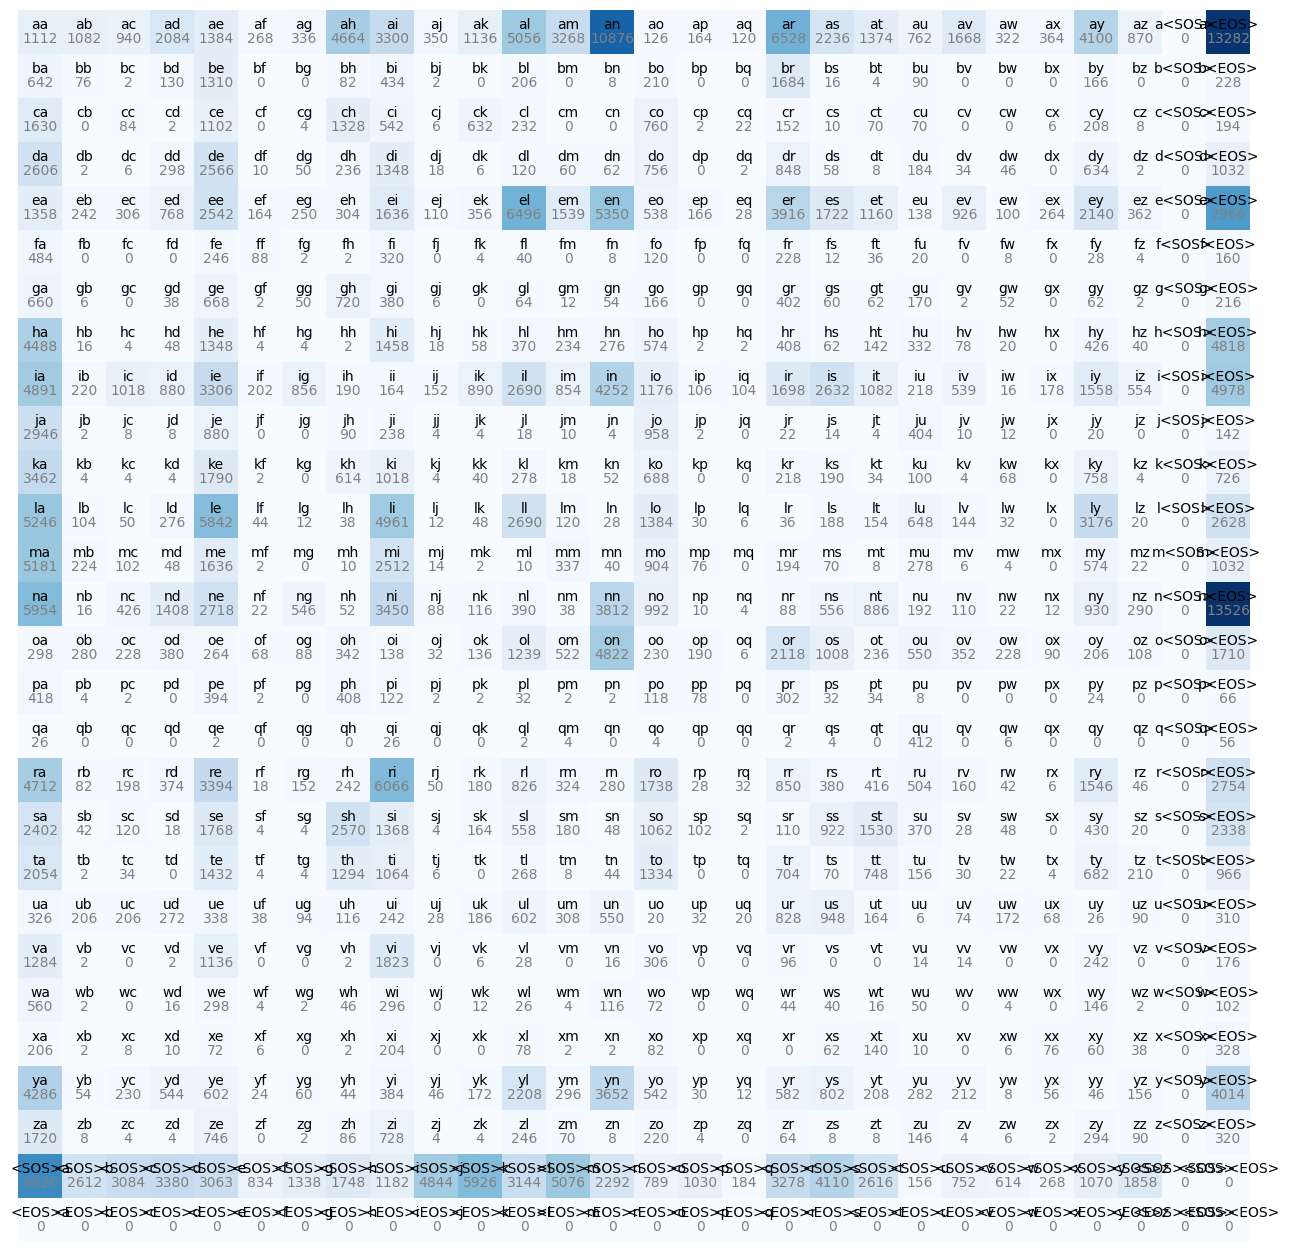

In [58]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') #.item() extracts value from tensor
plt.axis('off');

# N[2,1] represents, count of cb
#To get probability out of it, divide each row with rowsum. Count(ab)/Count(a) = Probability


### We have last row as 0 and 2nd last column as 0, so we can remove [char]<SOS> and <EOS>[char] and replace them with just one special character. We just care about <SOS><EOS>, because there can be no word

In [62]:
N=torch.zeros((27,27),dtype=torch.int32)

stoi = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    stoi[c]=i+1
stoi['.']=0

itos = {}
for i,c in enumerate(sorted(list(set(''.join(words))))):
    itos[i+1]=c
itos[0]='.'

In [63]:
for w in words:
    chs=['.']+list(w)+['.'] # Provide SOS and EOS tokens
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1    
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

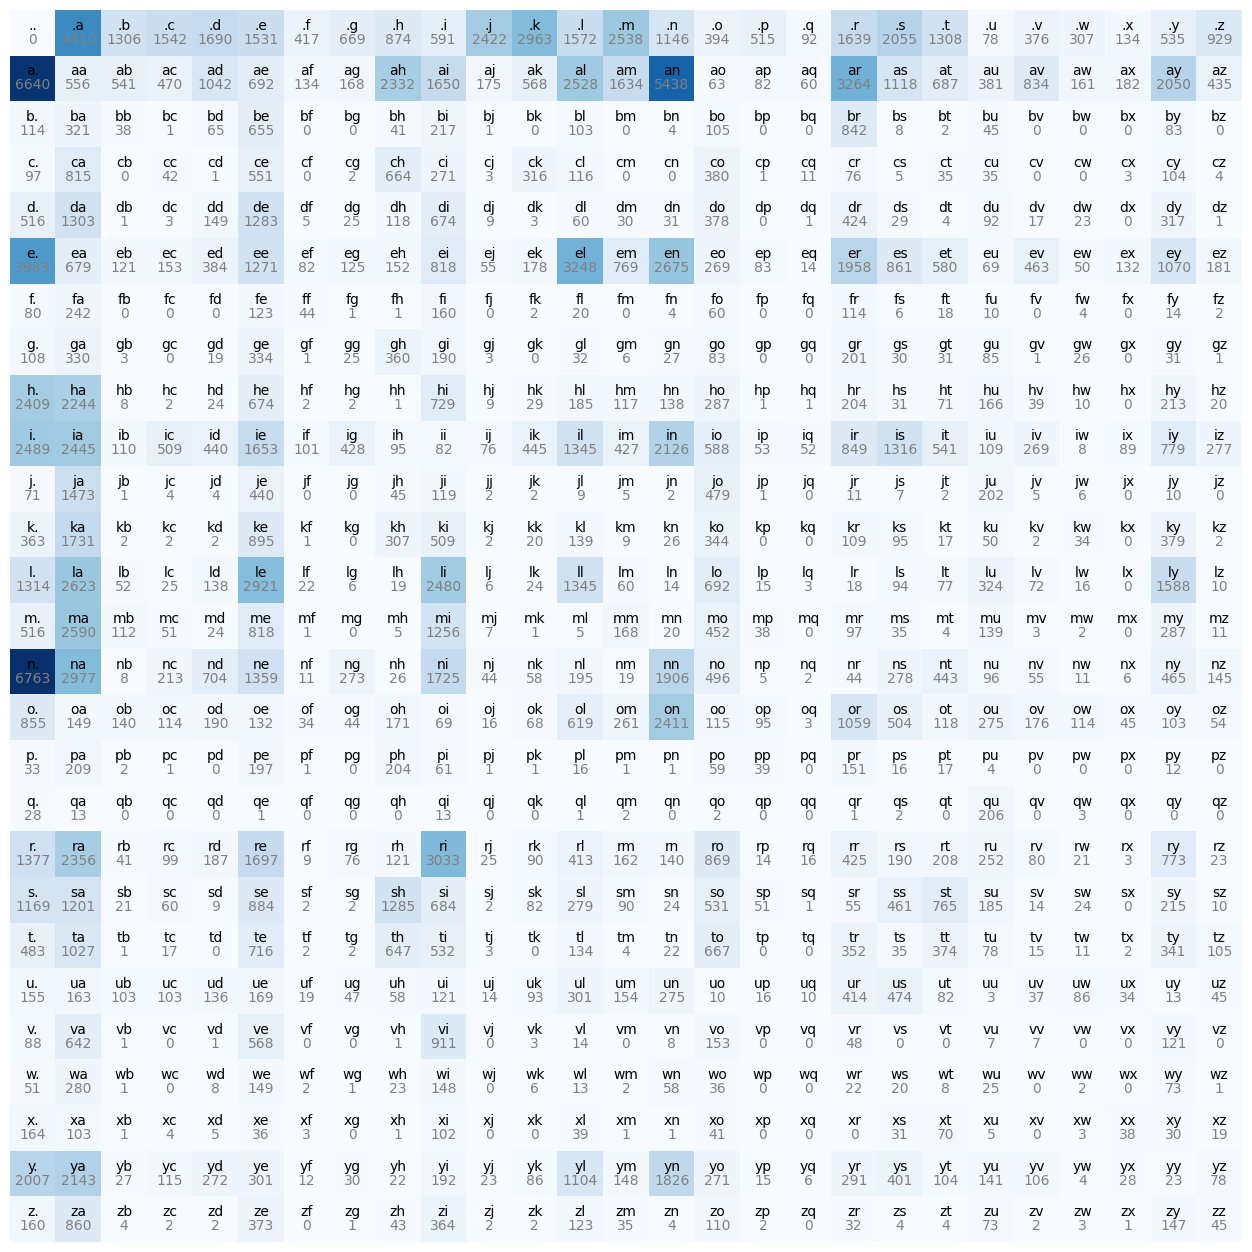

In [64]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') #.item() extracts value from tensor
plt.axis('off');

# N[2,1] represents, count of cb
#To get probability out of it, divide each row with rowsum. Count(ab)/Count(a) = Probability


## Generating Probability Distribution (Sampling from model)
* torch.multinomial : Picks numbers based of off their probability distribution

In [69]:
# Explaining how generator and torch.multinomial work
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p=p/p.sum()
print(p)

torch.multinomial(p,num_samples=20, replacement=True, generator=g)


tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

* Taking example of N[0]

In [74]:
p=N[0]
p=p/p.sum()
print(p)

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


In [82]:
g=torch.Generator().manual_seed(2147483647)
itos[torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()]

'c'

### Name generation using bi-gram model

In [85]:
g=torch.Generator().manual_seed(2147483647)

for i in range(10):
    names=[]
    ix=0
    while True:
        p=N[ix].float()
        p=p/p.sum()
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        names.append(itos[ix])
        if ix==0:
            break
    print(''.join(names))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


### Making above query efficient

In [94]:
P=N.float() 
P.shape

torch.Size([27, 27])

In [95]:
P.sum(1,keepdim=True) #Calculating Row Sum

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [96]:
P=P/P.sum(1,keepdim=True) #This is allowed, as P (27,27) and P.sum() (27,1)

In [98]:
g=torch.Generator().manual_seed(2147483647)

for i in range(10):
    names=[]
    ix=0
    while True:
        p=P[ix]

        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        names.append(itos[ix])
        if ix==0:
            break
    print(''.join(names))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


## Evaluating Bi-Gram model
* GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
* equivalent to maximizing the log likelihood (because log is monotonic)
* equivalent to minimizing the negative log likelihood
* equivalent to minimizing the average negative log likelihood

* log(a*b*c) = log(a) + log(b) + log(c)

In [99]:
P[0,6]

tensor(0.0130)

In [108]:
for w in words[:3]:
    print(w)
    for ix, iy in zip(w,w[1:]):
        x=stoi[ix]
        y=stoi[iy]
        print(f''' {ix} {iy} {P[x,y]:.4f}''')

# There are total 27 characters 1/27=0.04, so any probability>0.04 means that we learned something

emma
 e m 0.0377
 m m 0.0253
 m a 0.3899
olivia
 o l 0.0780
 l i 0.1777
 i v 0.0152
 v i 0.3541
 i a 0.1381
ava
 a v 0.0246
 v a 0.2495


* How can we summarize this probability into 1 number to assess model?
    * Maximum likelihood: Multiplication of probabilities should be high
    * In reality people work with log(likelihood), because of underflow issue

In [119]:
log_likelihood=0
cnt=0
for w in words:
    for ix, iy in zip(w,w[1:]):
        x=stoi[ix]
        y=stoi[iy]
        log_likelihood+=torch.log(P[x,y])
        cnt+=1

print(log_likelihood) #Maximized
print(-log_likelihood) #Minimized
print(-log_likelihood/cnt) #Minimized, average negative log likelihood (In practice)



tensor(-412436.5625)
tensor(412436.5625)
tensor(2.5136)


### Smoothing for when log likelihood is -inf/probability=0

In [120]:
log_likelihood=0
cnt=0
# for w in words[:2]:
for w in ['andrejq']:
    print(w)
    for ix, iy in zip(w,w[1:]):
        x=stoi[ix]
        y=stoi[iy]
        log_likelihood+=torch.log(P[x,y])
        print(f'{ix} {iy} Log Likelihood {log_likelihood}')
        cnt+=1

print(log_likelihood) #Maximized
print(-log_likelihood) #Minimized
print(-log_likelihood/cnt) #Minimized, average negative log likelihood (In practice)



andrejq
a n Log Likelihood -1.8295611143112183
n d Log Likelihood -5.088913440704346
d r Log Likelihood -7.650956153869629
r e Log Likelihood -9.6636962890625
e j Log Likelihood -15.580780029296875
j q Log Likelihood -inf
tensor(-inf)
tensor(inf)
tensor(inf)


In [121]:
P=(N+1).float() #Add-1 smoothing. The more we add the more uniform model becomes, the less we add the more peaked is our model
P.shape
P.sum(1,keepdim=True) #Calculating Row Sum
P=P/P.sum(1,keepdim=True) #This is allowed, as P (27,27) and P.sum() (27,1)

### No -INF probabilities

In [122]:
log_likelihood=0
cnt=0
# for w in words[:2]:
for w in ['andrejq']:
    print(w)
    for ix, iy in zip(w,w[1:]):
        x=stoi[ix]
        y=stoi[iy]
        log_likelihood+=torch.log(P[x,y])
        print(f'{ix} {iy} Log Likelihood {log_likelihood}')
        cnt+=1

print(log_likelihood) #Maximized
print(-log_likelihood) #Minimized
print(-log_likelihood/cnt) #Minimized, average negative log likelihood (In practice)



andrejq
a n Log Likelihood -1.8301737308502197
n d Log Likelihood -5.089578628540039
d r Log Likelihood -7.654166221618652
r e Log Likelihood -9.668440818786621
e j Log Likelihood -15.568826675415039
j q Log Likelihood -23.550559997558594
tensor(-23.5506)
tensor(23.5506)
tensor(3.9251)


# We trained a Bi-Gram character level language model!!